<a href="https://colab.research.google.com/github/componavt/sns4human/blob/main/src/vk%20/nlp/lemma_tag_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pymorphy3

In [ ]:
pip install emoji

In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
!pip install stopwords

In [ ]:
import pandas as pd
import emoji
import pymorphy3
import nltk
from nltk.tokenize import word_tokenize
from googletrans import Translator
from stopwords import get_stopwords
nltk.download('punkt')
nltk.download('punkt_tab')

In [ ]:
posts = {
    'state': [
        'https://raw.githubusercontent.com/componavt/sns4human/refs/heads/main/data/vk/posts/aparfenchikov.csv',
        'https://raw.githubusercontent.com/componavt/sns4human/refs/heads/main/data/vk/posts/minnazrk.csv'
    ],
    'museum': [
        'https://raw.githubusercontent.com/componavt/sns4human/refs/heads/main/data/vk/posts/rk_nationalmuseum.csv',
        'https://raw.githubusercontent.com/componavt/sns4human/refs/heads/main/data/vk/posts/olonmus.csv'
    ]
}

morph = pymorphy3.MorphAnalyzer()
translator = Translator()

alphabet = set('абвгдеёжзийклмнопрстуфхцчшщъыьэюя-abcdefghijklmnopqrstuvwxyz')
stopwords = get_stopwords('ru')
stopwords.extend( ['"', '\'', '.', ',', '\n', ':', ';', '?', '!', '', ' ',  '-', '_','[',']','https',])
check_hash = False

dicts_lemm = {}

**Частотный список всех слов по группам: официальные и музейные. В списке рассматриваются только те слова, которых нет в другой группе.**

In [ ]:
for key in posts.keys():
    dicts_lemm[key] = {}
    for url in posts[key]:
        df = pd.read_csv(url, header=None, usecols=[1])
        for items in df.items():
            for i in range(1, len(items[1])):
                if not isinstance(items[1][i], str):
                    continue
                tokens = word_tokenize(items[1][i])
                for word in tokens:
                    if word == '#':
                        check_hash = True
                        continue
                    if check_hash:
                        check_hash = False
                        continue
                    set_word = set(word.lower())
                    if word in stopwords or ":" in emoji.demojize(word) or not set_word.issubset(alphabet):
                        continue
                    if word.isupper() and len(word) <= 3:
                        lemma = word
                    else:
                        word = word.lower()
                        lemma = morph.parse(word)[0].normal_form
                    if dicts_lemm[key].get(lemma, 0) == 0:
                        dicts_lemm[key][lemma] = 1
                    else:
                        dicts_lemm[key][lemma] += 1
    dicts_lemm[key] = dict(sorted(dicts_lemm[key].items(), key=lambda item: item[1], reverse=True))

In [ ]:
freq_words = {}

for key in dicts_lemm.keys():
    freq_words[key] = {}
    for lemma, count in dicts_lemm[key].items():
        if len(freq_words[key]) == 100:
            break
        for another_key in posts.keys():
            if key != another_key:
                if lemma not in dicts_lemm[another_key]:
                    freq_words[key][lemma] = count
            elif len(posts.keys()) == 1:
                freq_words[key][lemma] = count

    d = {'Частотные слова': freq_words[key].keys(), 'Частота': freq_words[key].values()}
    df = pd.DataFrame(data=d)
    df.to_csv('frequency_' + key + '_groups.csv', index=False, encoding='utf-8')

In [ ]:
!pip install stop_words

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32894 sha256=ffb2cd97892fc195923c5c993edaf1ae8fcfb1211da7a2ef04a4d32fab47f6fb
  Stored in directory: /root/.cache/pip/wheels/8f/a5/51/a5405e1da5d178491b79d12cc81b6cb9bb14fe2c8c632eba70
Successfully built stop_words


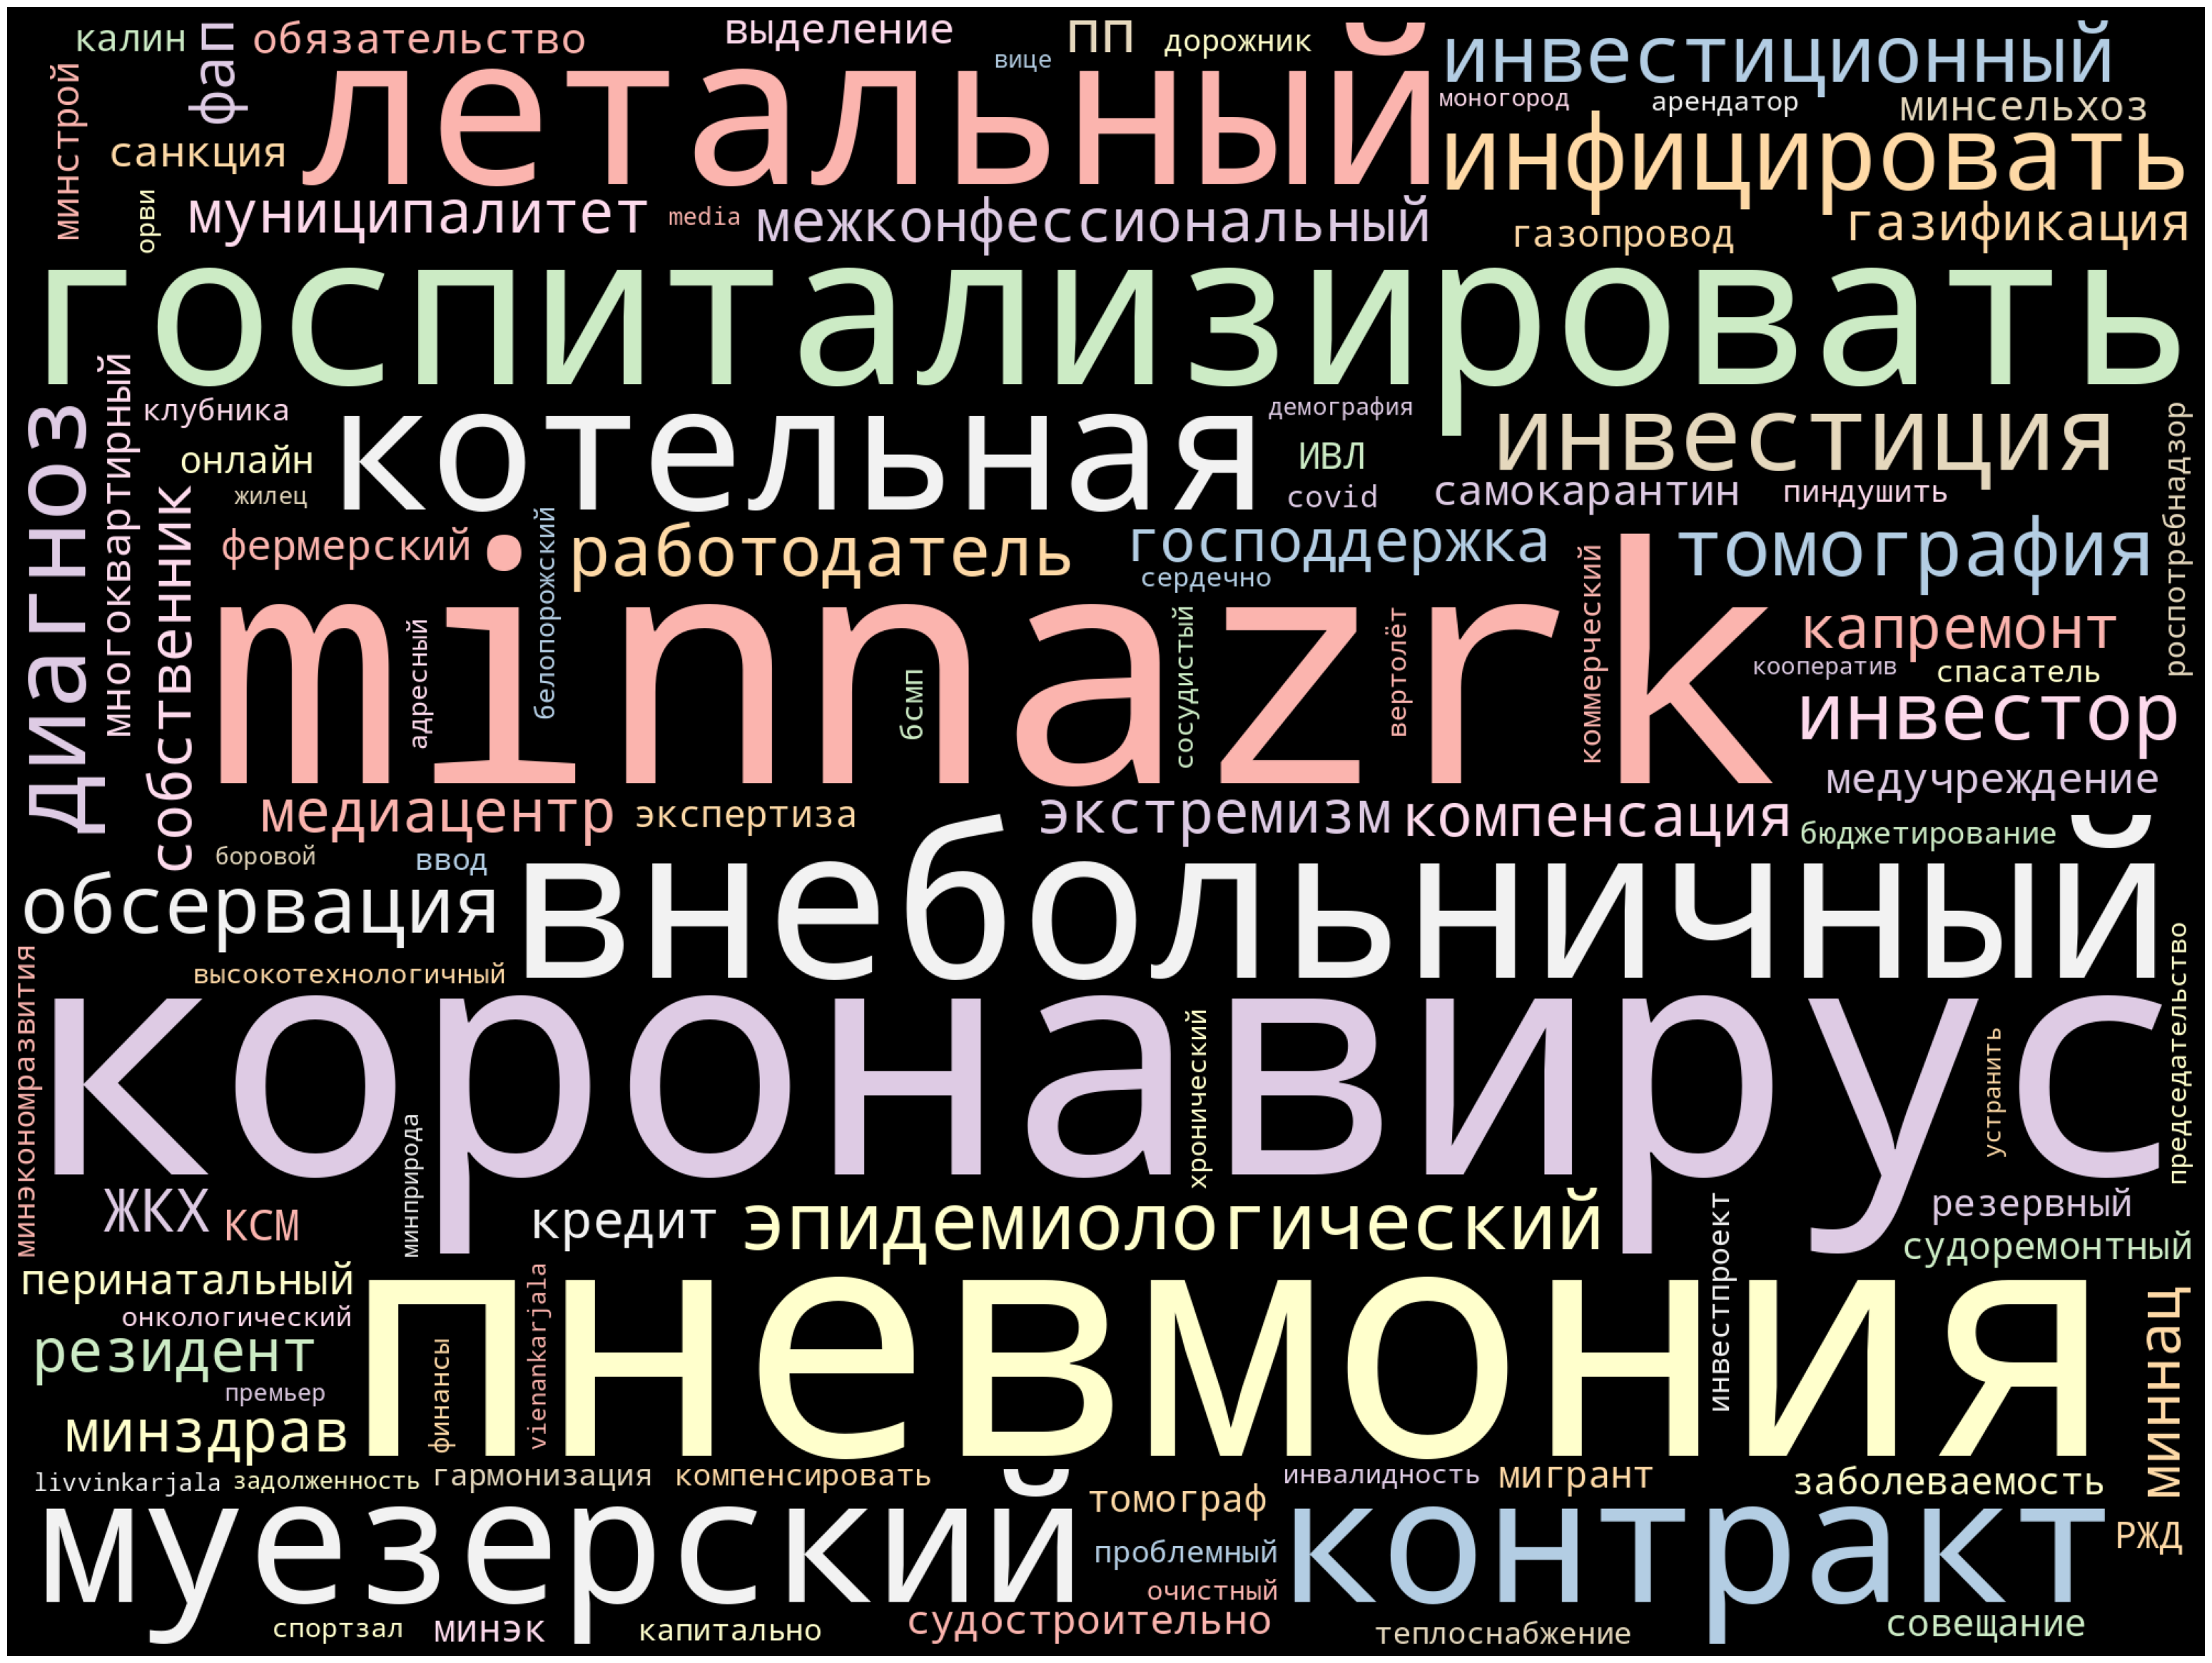

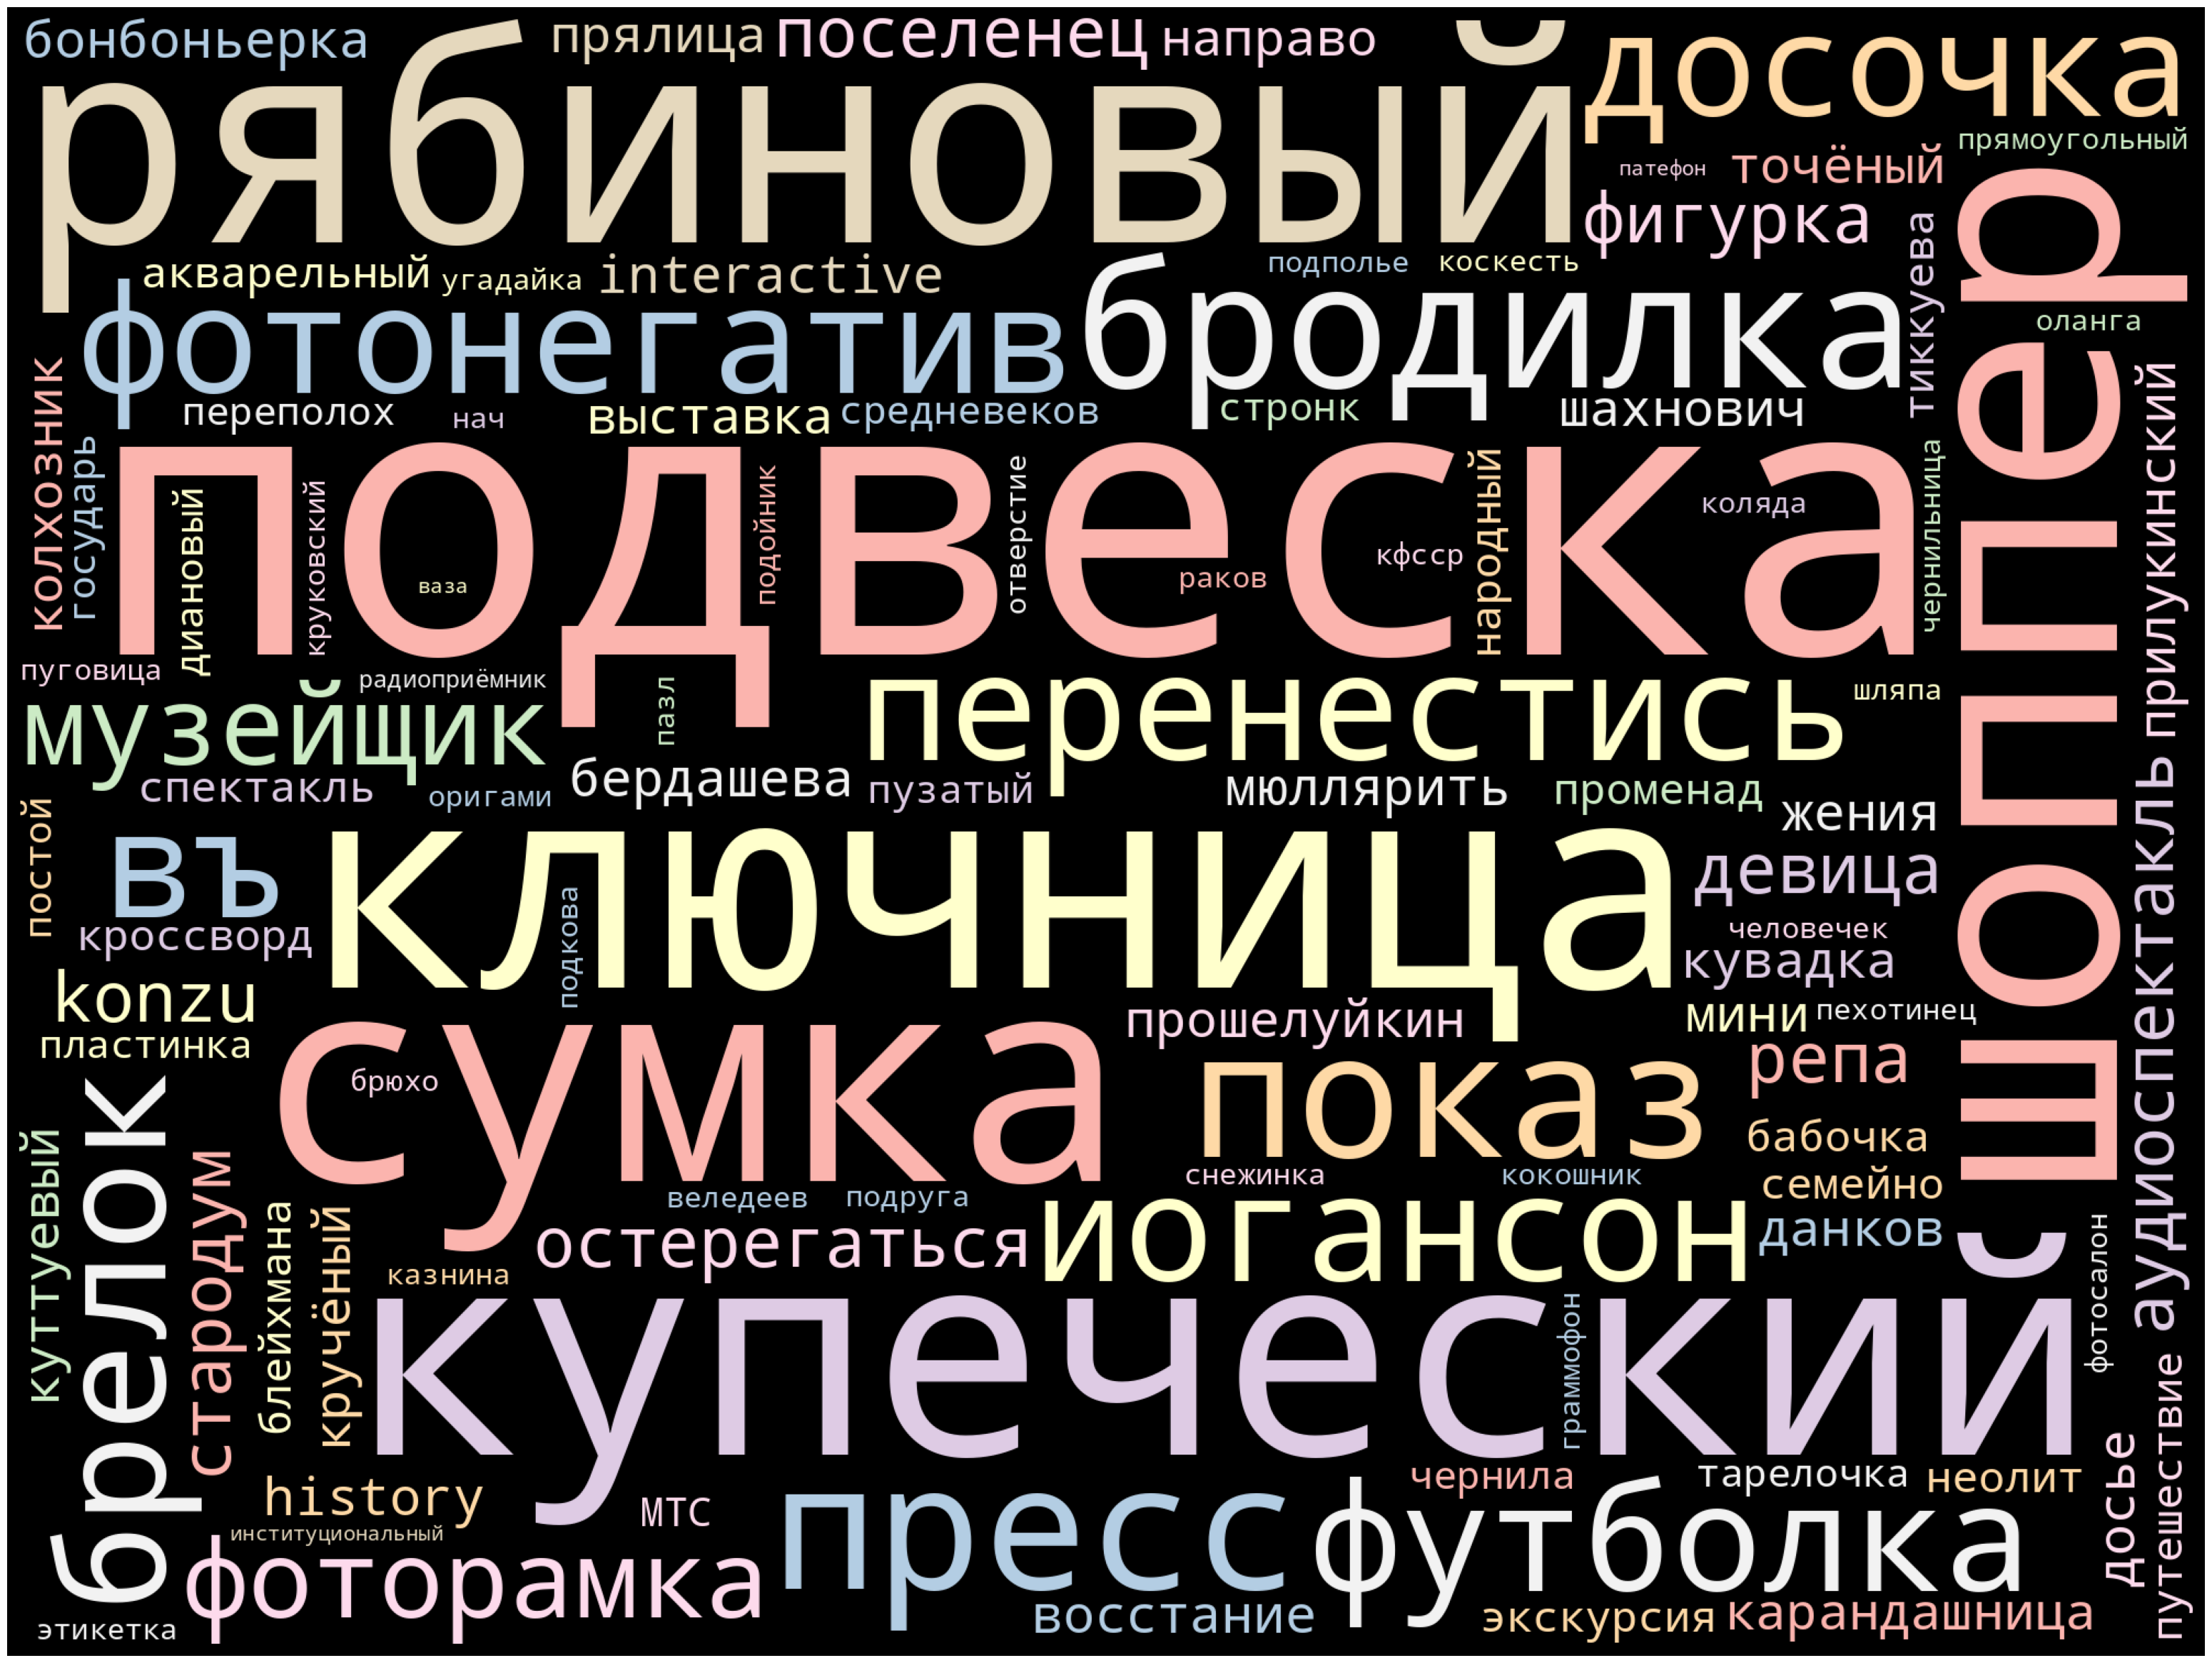

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")

for key in posts.keys():
  text = ''
  words = pd.read_csv('frequency_' + key +'_groups.csv', index_col=None)["Частотные слова"].tolist()
  for word in words:
     text += word + ' '
  STOPWORDS_RU = stopwords
  wordcloud = WordCloud(width = 2000,
                        height = 1500,
                        random_state=1,
                        background_color='black',
                        margin=20,
                        colormap='Pastel1',
                        collocations=False,
                        stopwords = STOPWORDS_RU).generate(text)
  plot_cloud(wordcloud)

**Английская версия облака  тэгов**

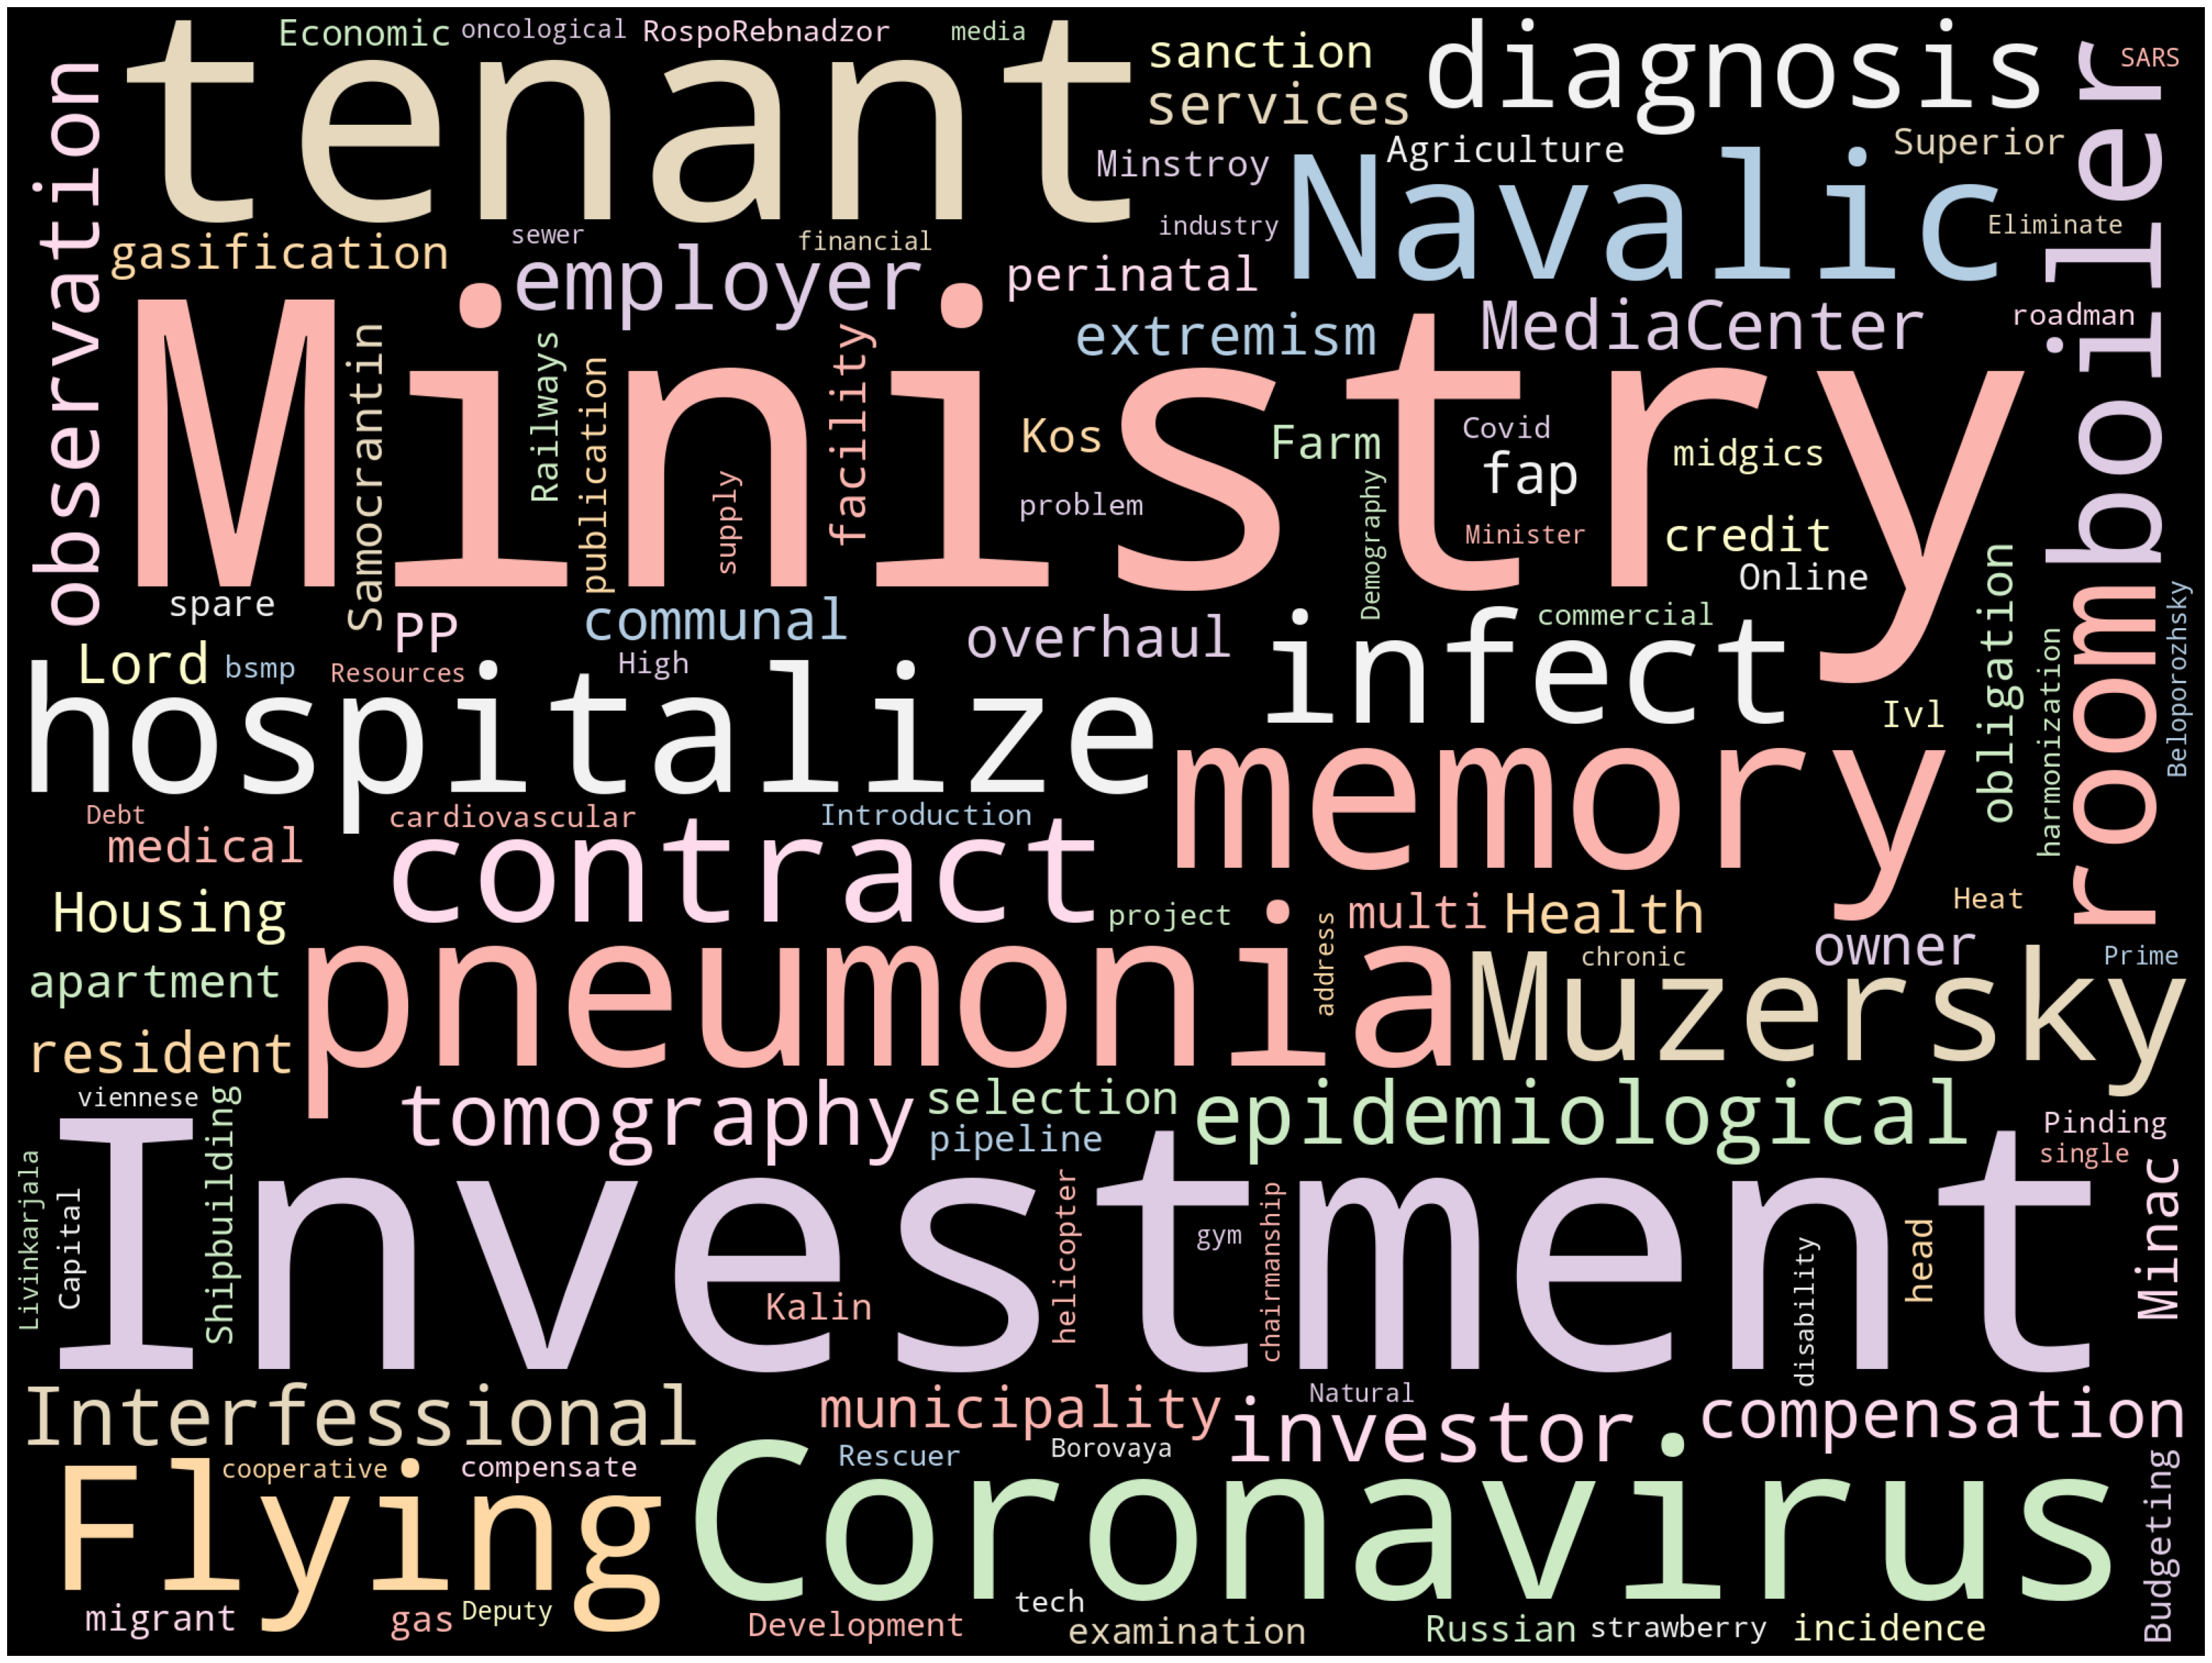

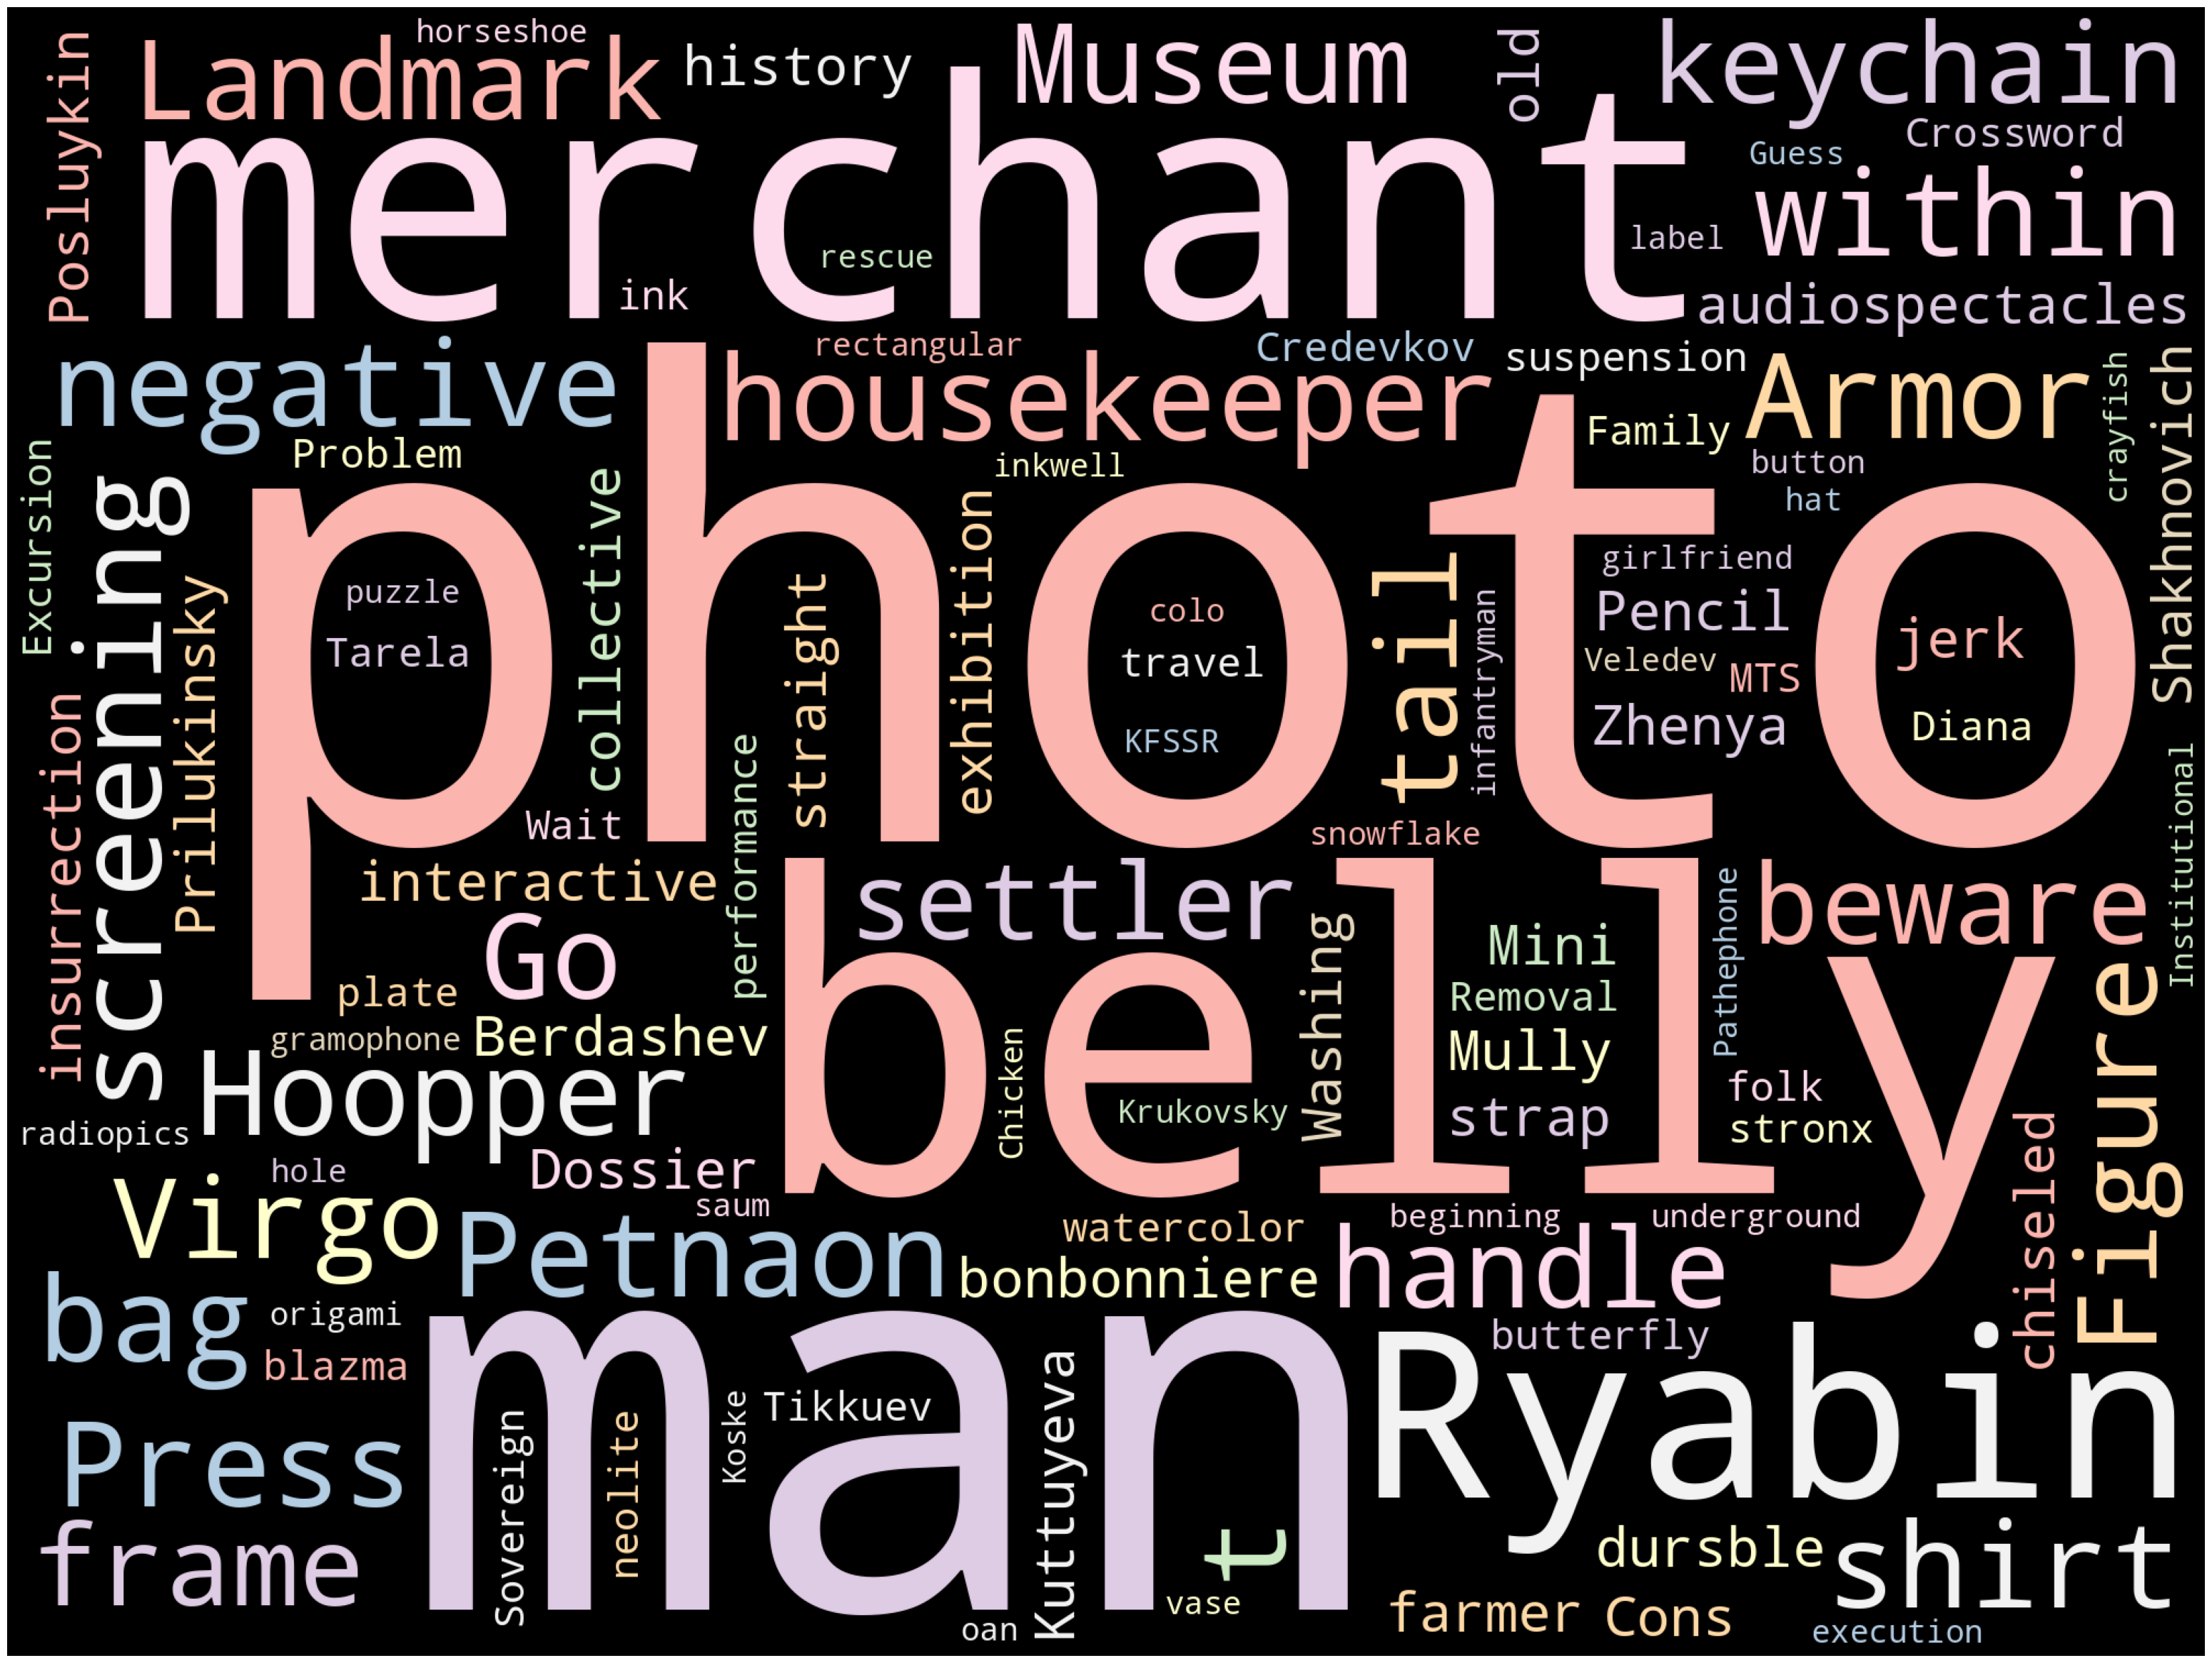

In [ ]:
from wordcloud import WordCloud
import stop_words
from stop_words import get_stop_words
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")

for key in posts.keys():
  text = ''
  words = pd.read_csv('frequency_' + key +'_groups.csv', index_col=None)["Частотные слова"].tolist()
  for word in words:
     word= translator.translate(word, dest='en').text
     text += word + ' '
  STOPWORDS_RU = get_stopwords('en')
  wordcloud = WordCloud(width = 2000,
                        height = 1500,
                        random_state=1,
                        background_color='black',
                        margin=20,
                        colormap='Pastel1',
                        collocations=False,
                        stopwords = STOPWORDS_RU).generate(text)
  plot_cloud(wordcloud)

**Статистика по 4 Вк группам: количество токенов, уникальных слов, постов, среднее количество слов в посте.**

In [ ]:
pip install -U spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 73.4 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.8.4 which is incompatible.


In [ ]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 32.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
groups_posts = []
tokens = []
unique_words = []
mid_len_post = []
nlp = spacy.load("ru_core_news_sm")

def lemmatization(sent):
    doc = nlp(sent)
    hashtag_flag = False
    cnt_tokens = 0
    for token in doc:
        cnt_tokens += 1
        if hashtag_flag:
            lemma = '#' + token.lemma_
            hashtag_flag = False
        else:
            if token.text == '#':
                hashtag_flag = True
                continue
            set_word = set(str(token).lower())
            if str(token) in stopwords or ":" in emoji.demojize(str(token)) or not set_word.issubset(alphabet):
                continue
            lemma = token.lemma_
        if dict_lem.get(lemma, 0) == 0:
            dict_lem[lemma] = 1
        else:
            dict_lem[lemma] += 1
    return cnt_tokens

urls = []
for key in posts.keys():
    for url in posts[key]:
      urls.append(url)
      p = 0
      t = 0
      dict_lem = {}
      df = pd.read_csv(url, header=None, usecols=[1])
      for items in df.items():
          for i in range(1, len(items[1])):
                if not isinstance(items[1][i], str):
                      continue
          for i in range(1, len(items[1])):
              p += 1
              t += lemmatization(str(items[1][i]))
          mid_len_post.append(t // p)
          dict_lem = dict(sorted(dict_lem.items(), key=lambda item: item[1], reverse=True))
          tokens.append(t)
          groups_posts.append(p)
          unique_words.append(len(dict_lem))

d = {'Группа ВК': urls, 'Количество постов': groups_posts, 'Количество токенов': tokens, 'Количество уникальных слов': unique_words, 'Средняя длина поста в словах': mid_len_post}
df = pd.DataFrame(data=d)
df.to_csv('statistics.csv', index=False, encoding='utf-8')